# KNN

### Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from joblib import dump, load

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import RandomizedSearchCV, HalvingGridSearchCV

In [3]:
from preprocessing import reemplazarNulls,reemplazarCategoricas,reemplazarFechas,targetBooleano,regularizar,reemplazarCategoricas_OHE,reemplazarNullsNum,keepFeat_OHE

[###] Initial Preprocessings Done                           
[###] Aditional Preprocessings Done                                                   


In [4]:
from utilities import score, score2, df_feat, df_targ, train_val

### Codigo a correr

In [5]:
MAX_ITER = 10**6
MAX_JOBS = -1

**Run :** Entrenar Nuevamente o Cargar Entrenado

In [6]:
runAuto = False
runScaled = False
runOhe = True

**Save :** Guardar Modelo (pisa anterior)

In [7]:
saveAuto = True
saveScaled = True
saveOhe = True
saveBest = True

In [8]:
predictions = pd.DataFrame()

### Preprocesamiento

In [9]:
df_targ=targetBooleano(df_targ)
ohe_feat = reemplazarCategoricas_OHE(df_feat)

reemplazarNulls(df_feat , inplace=True)
reemplazarCategoricas(df_feat , inplace=True)
reemplazarFechas(df_feat , inplace=True)

scaled_feat = regularizar(df_feat , scaleFunc='std')
regularizar(df_feat , inplace=True)

reemplazarNullsNum(ohe_feat, inplace=True)
reemplazarFechas(ohe_feat , inplace=True)
keepFeat_OHE(ohe_feat, 10, inplace=True)

,humedad_tarde,horas_de_sol,llovieron_hamburguesas_hoy_no,llovieron_hamburguesas_hoy_si,nubosidad_tarde,nubosidad_temprano,humedad_temprano,mm_lluvia_dia,presion_atmosferica_temprano,rafaga_viento_max_velocidad
id,,,,,,,,,,
74816,78.0,7.629393,0,1,4.50597,4.430203,74.0,68.0,1026.200000,48.0
64318,14.0,7.629393,0,1,1.00000,4.430203,56.0,5.8,1002.500000,61.0
54357,79.0,2.600000,1,0,8.00000,7.000000,47.0,0.0,1005.800000,57.0
1762,92.0,0.000000,0,1,8.00000,8.000000,96.0,5.0,1016.800000,54.0
89422,14.0,7.629393,1,0,2.00000,4.430203,37.0,0.0,1011.100000,50.0
...,...,...,...,...,...,...,...,...,...,...
49272,63.0,6.500000,1,0,6.00000,2.000000,44.0,0.4,1014.500000,72.0
13885,65.0,2.100000,0,1,7.00000,7.000000,80.0,5.2,1016.300000,48.0
4586,81.0,7.629393,1,0,4.50597,4.430203,62.0,0.0,1017.655555,35.0


In [10]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102356 entries, 74816 to 32535
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   direccion_viento_tarde       102356 non-null  float64
 1   direccion_viento_temprano    102356 non-null  float64
 2   horas_de_sol                 102356 non-null  float64
 3   humedad_tarde                102356 non-null  float64
 4   humedad_temprano             102356 non-null  float64
 5   mm_lluvia_dia                102356 non-null  float64
 6   nubosidad_tarde              102356 non-null  float64
 7   presion_atmosferica_tarde    102356 non-null  float64
 8   rafaga_viento_max_direccion  102356 non-null  float64
 9   rafaga_viento_max_velocidad  102356 non-null  float64
 10  velocidad_viendo_tarde       102356 non-null  float64
dtypes: float64(11)
memory usage: 9.4 MB


In [11]:
train_feat, val_feat, train_targ, val_targ = train_val( df_feat, df_targ, True )
train_feat2, val_feat2, train_targ2, val_targ2 = train_val( scaled_feat, df_targ, True )
train_feat3, val_feat3, train_targ3, val_targ3 = train_val( ohe_feat, df_targ, True )

## Entrenamiento

### Auto

In [12]:
if (runAuto):
    knn_auto = KNeighborsClassifier()
    params = {
        'weights': ['uniform','distance'],
        'n_neighbors': np.arange(30,200,30)
    }
    
    knn_auto_grid = HalvingGridSearchCV(
        knn_auto,
        params,
        scoring='roc_auc',
        n_jobs=MAX_JOBS,
        return_train_score=True,
        verbose=1,
    ).fit(train_feat, train_targ)
    
    # Guardar
    if(saveAuto):
        dump(knn_auto_grid, 'models/KNN/knn_grid.sk')
else:
    # Cargar
    knn_auto_grid = load('models/KNN/knn_grid.sk')

In [13]:
print(f"Best score: {knn_auto_grid.best_score_}")
print(f"Best params {knn_auto_grid.best_params_}")

Best score: 0.8662587242836324
Best params {'weights': 'distance', 'n_neighbors': 90}


In [14]:
knn_auto = knn_auto_grid.best_estimator_

AUC-ROC: 0.8656961235061557
              precision    recall  f1-score   support

       False       0.85      0.96      0.90      7946
        True       0.75      0.42      0.54      2290

    accuracy                           0.84     10236
   macro avg       0.80      0.69      0.72     10236
weighted avg       0.83      0.84      0.82     10236

CONFUSION MATRIX
CPU times: user 18.2 s, sys: 65.9 ms, total: 18.2 s
Wall time: 18.2 s


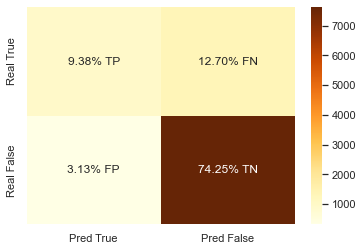

In [15]:
%%time
pred = knn_auto.predict(val_feat)
prob = knn_auto.predict_proba(val_feat)
score(val_targ,pred, prob[:,1])

In [16]:
pdf = score2('KNN 1','Regularizado',val_targ, pred, prob[:,1])
predictions = predictions.append( pdf )

### Scaled

In [17]:
if (runScaled):
    knn_scaled = KNeighborsClassifier()
    params = {
        'weights': ['uniform','distance'],
        'n_neighbors': np.arange(60,120,20)
    }
    
    knn_scaled_grid = HalvingGridSearchCV(
        knn_scaled,
        params,
        scoring='roc_auc',
        n_jobs=MAX_JOBS,
        return_train_score=True,
        verbose=1,
    ).fit(train_feat2, train_targ2)
    
    # Guardar
    if(saveScaled):
        dump(knn_scaled_grid, 'models/KNN/knn_scaled_grid.sk')
else:
    # Cargar
    knn_scaled_grid = load('models/KNN/knn_scaled_grid.sk')

In [18]:
print(f"Best score: {knn_scaled_grid.best_score_}")
print(f"Best params {knn_scaled_grid.best_params_}")

Best score: 0.8616244163872258
Best params {'n_neighbors': 80, 'weights': 'distance'}


In [19]:
knn_scaled = knn_scaled_grid.best_estimator_

AUC-ROC: 0.8606763502990161
              precision    recall  f1-score   support

       False       0.85      0.96      0.90      7946
        True       0.75      0.39      0.52      2290

    accuracy                           0.83     10236
   macro avg       0.80      0.68      0.71     10236
weighted avg       0.82      0.83      0.81     10236

CONFUSION MATRIX
CPU times: user 15.5 s, sys: 47.4 ms, total: 15.5 s
Wall time: 15.5 s


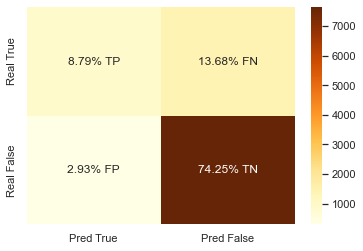

In [20]:
%%time
pred = knn_scaled.predict(val_feat2)
prob = knn_scaled.predict_proba(val_feat2)
score(val_targ2,pred, prob[:,1])

In [21]:
pdf = score2('KNN 2','Regularizado y Escalado',val_targ2, pred, prob[:,1])
predictions = predictions.append( pdf )

### One Hot Encoded + Seleccion de Variables

In [22]:
if (runOhe):
    knn_ohe = KNeighborsClassifier()
    params = {
        'weights': ['uniform','distance'],
        'n_neighbors': np.arange(70,100,5)
    }
    
    knn_ohe_grid = HalvingGridSearchCV(
        knn_ohe,
        params,
        scoring='roc_auc',
        n_jobs=MAX_JOBS,
        return_train_score=True,
        verbose=1,
    ).fit(train_feat3, train_targ3)
    
    # Guardar
    if(saveOhe):
        dump(knn_ohe_grid, 'models/KNN/knn_ohe_grid.sk')
else:
    # Cargar
    knn_ohe_grid = load('models/KNN/knn_ohe_grid.sk')

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 10235
max_resources_: 92120
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 12
n_resources: 10235
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 1
n_candidates: 4
n_resources: 30705
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 2
n_candidates: 2
n_resources: 92115
Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [23]:
print(f"Best score: {knn_ohe_grid.best_score_}")
print(f"Best params {knn_ohe_grid.best_params_}")

Best score: 0.862653116320468
Best params {'n_neighbors': 90, 'weights': 'distance'}


In [24]:
knn_ohe = knn_ohe_grid.best_estimator_

AUC-ROC: 0.8582323698062357
              precision    recall  f1-score   support

       False       0.85      0.96      0.90      7946
        True       0.76      0.42      0.54      2290

    accuracy                           0.84     10236
   macro avg       0.81      0.69      0.72     10236
weighted avg       0.83      0.84      0.82     10236

CONFUSION MATRIX
CPU times: user 47.5 s, sys: 12.8 s, total: 1min
Wall time: 37.9 s


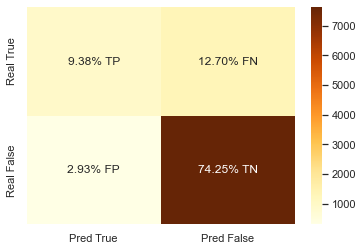

In [25]:
%%time
pred = knn_ohe.predict(val_feat3)
prob = knn_ohe.predict_proba(val_feat3)
score(val_targ3,pred, prob[:,1])

In [26]:
pdf = score2('KNN 3','OHE y Seleccion',val_targ3, pred, prob[:,1])
predictions = predictions.append( pdf )

## Resultados

In [27]:
predictions

,Modelo,Preprocesamientos,Clase,AUC-ROC,Accuracy,Precision,Recall,F1 score,Support
0,KNN 1,Regularizado,AVG,0.865696,0.839586,0.829835,0.839586,0.821687,10236
1,KNN 1,Regularizado,True,NaN,NaN,0.753125,0.420961,0.540056,2290
2,KNN 1,Regularizado,False,NaN,NaN,0.851943,0.960232,0.902852,7946
0,KNN 2,Regularizado y Escalado,AVG,0.860676,0.834896,0.824724,0.834896,0.814306,10236
1,KNN 2,Regularizado y Escalado,True,NaN,NaN,0.750836,0.392140,0.515204,2290
2,KNN 2,Regularizado y Escalado,False,NaN,NaN,0.846018,0.962497,0.900506,7946
0,KNN 3,OHE y Seleccion,AVG,0.858232,0.840172,0.830855,0.840172,0.821948,10236
1,KNN 3,OHE y Seleccion,True,NaN,NaN,0.758703,0.418777,0.539674,2290
2,KNN 3,OHE y Seleccion,False,NaN,NaN,0.851650,0.961616,0.903298,7946


In [28]:
if(saveBest):
    dump(knn_auto, 'models/KNN/knn.sk')